# What are we dealing with? Given Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fix random seed for reproducibility- Whenever we work with machine learning algorithms that use 
#a stochastic process(e.g. random numbers), it is a good idea to initialize the random number generator with
#a ﬁxed seed value. This is useful if you need to demonstrate a result, compare algorithms using the same
#source of randomness or to debug a part of your code.
np.random.seed(47)

In [3]:
# examine ground truth
ground_truth_file = './dev-set_ground-truth.csv'
ground_truth = pd.read_csv(ground_truth_file)
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [4]:
# video captions
video_captions = list(open('./dev-set_video-captions.txt', 'r'))
video_captions = [i.split('\t') for i in video_captions]
video_captions = [[a, b.strip()] for a, b in video_captions]
video_captions = pd.DataFrame(video_captions, columns=['video', 'caption'])
video_captions.head(5)

,video,caption
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot


In [5]:
video_captions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
video      6000 non-null object
caption    6000 non-null object
dtypes: object(2)
memory usage: 93.8+ KB


In [6]:
# We can see that text annotations are sentences with dashes instead of spaces.
# Lets see what are the most memorable and least memorable captions
# To do this it will be useful to merge this dataframe with the ground truth

ground_truth_captions = video_captions.merge(ground_truth, left_on='video', right_on='video')
ground_truth_captions.head(5)

#left_on − "Columns" from the left DataFrame to use as keys. 
#Can either be column names or arrays with length equal to the length of the DataFrame.

#right_on − "Columns" from the right DataFrame to use as keys. 
#Can either be column names or arrays with length equal to the length of the DataFrame.

,video,caption,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,blonde-woman-is-massaged-tilt-down,0.924,34,0.846,13
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,0.923,33,0.667,12
2,video6.webm,khr-gangsters,0.863,33,0.700,10
3,video8.webm,medical-helicopter-hovers-at-airport,0.922,33,0.818,11
4,video10.webm,couple-relaxing-on-picnic-crane-shot,0.950,34,0.900,10


In [7]:
### Most Memorable Short Term Videos
top_short_term_captions = (ground_truth_captions
                           .sort_values('short-term_memorability',
                                        ascending=False)['caption'])

### Most Memorable Long Term Captions
top_long_term_captions = (ground_truth_captions
                          .sort_values('long-term_memorability',
                                       ascending=False)['caption'])
### sort() for list
### sort_values(['column', 'column']) for df

In [8]:
### Most
for i in top_short_term_captions[:5]:
    print(i)

camera-moves-in-on-beared-man-with-shovel-taking-a-breather-with-truck-in-b
mather-and-daughter-enjoying-a-movie-on-tablet
happy-stylish-elegant-young-couple-welcoming-in-the-new-year-with-sparklers-looking-at-the-camera-with-warm-friendly-smiles-against-winkling-party-lights
head-of-big-yellow-eel
funny-little-boy-sitting-at-desk-eating-apple-and-drawing


In [9]:
### Least 
# use fancy indexing to reverse array
for i in (top_short_term_captions)[::-1][:5]:
    print(i)

timelapse-of-snow-mountains
snow-capped-mountain-at-dusk
grey-canyons-and-valleys
grassy-field-with-flowers-and-trees
dark-sea-with-bright-sky


In [10]:
### Most
for i in top_long_term_captions[:5]:
    print(i)

nurses-moving-patient-from-one-to-another
cute-blond-woman-in-lifestyle-scene-in-white-luxury-bedroom
female-doctor-showing-patients-x-ray-of-chest-using-tablet
people-walking-down-snowy-street
kitten-playing-with-string


In [11]:
### Least 
# use fancy indexing to reverse array
for i in (top_long_term_captions)[::-1][:5]:
    print(i)

barista-makes-latte-cappuccino-in-coffee-machine
videoblocks-tree-roots-protrude-from-eroded-ground-by-lago-roca-in-tierra-del-fuego-national-park
texas-leonabelle-turnbull-birding-center-flying-birds
two-moose-walking-uphill-through-the-snow
desert-landscape-to-tree-dolly


### Q1. What words are available?

In [5]:
from string import punctuation
import pyprind
from collections import Counter
from keras.preprocessing.text import Tokenizer

counts = Counter() # empty counter...
# Counter() is a dict subclass for counting hashable objects. It is an unordered collection where elements
#are stored as dictionary keys and their counts are stored as dictionary values...


# setup prograss tracker
pbar = pyprind.ProgBar(len(video_captions['caption']), title='Counting word occurrences')


for i, cap in enumerate(video_captions['caption']):
    # replace punctuations with space
    # convert words to lower case 
    text = ''.join([c if c not in punctuation else ' ' for c in cap]).lower()
    video_captions.loc[i,'caption'] = text
    # .loc[,]: Access a group of rows and columns by label(s)
    
    
    pbar.update()
    counts.update(text.split())

Using TensorFlow backend.
Counting word occurrences
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


In [6]:
print(counts) # No.of occurrence 

Counter({'in': 2105, 'the': 1835, 'on': 1724, 'and': 1444, 'a': 1181, 'with': 996, 'woman': 899, 'of': 836, 'at': 762, 'young': 724, 'man': 559, 'slow': 495, 'motion': 452, 'to': 416, 'couple': 318, 'sitting': 304, 'girl': 291, 'happy': 279, 'beach': 270, 'park': 256, 'up': 255, 'walking': 237, 'close': 230, 'camera': 230, 'her': 219, 'using': 218, 'shot': 215, 'smiling': 198, 'looking': 195, 'two': 191, 'by': 189, 'people': 188, 'from': 188, 'tablet': 184, 'is': 181, 'water': 171, 'through': 156, 'female': 150, 'computer': 149, 'view': 149, 'laptop': 139, 'playing': 137, 'sunset': 137, 'beautiful': 133, 'videoblocks': 131, 'his': 131, 'running': 130, 'talking': 129, 'city': 128, 'working': 127, 'eating': 126, 'little': 126, 'family': 125, 'mother': 124, 'background': 122, 'home': 122, 'standing': 121, 'for': 115, 'phone': 115, 'or': 114, 'sea': 113, 'national': 112, 'african': 111, 'attractive': 111, 'tree': 107, 'snow': 103, 'their': 102, 'drinking': 102, 'hands': 102, 'steadicamof':

In [18]:
len(counts)

5191

### Q2. Separate words and Count each word's occurrence. Maping each unique word to an integer (one-hot encoding)

In [19]:
len(video_captions.caption.values), video_captions.caption.values

(6000, array(['blonde woman is massaged tilt down',
        'roulette table spinning with ball in closeup shot',
        'khr gangsters', ..., 'students walking in university of mexico',
        'beautiful black woman at spa',
        'beautiful modern brunette woman using tablet computer in luxury bed'],
       dtype=object))

In [20]:
video_captions.caption.values.shape

(6000,)

In [7]:
# build the word index

# Tokenizer() class allows to vectorize a text corpus, by turning each text into either a sequence of int
#(each integer being the index of a token in a dictionary) or into a vector where the coefficient for each 
#token could be binary, based on word count...
tokenizer = Tokenizer(num_words=len(counts)) 
# tell it 'num_words': the maximum number of unique words(5191) to keep, based on word frequency

In [8]:
tokenizer.fit_on_texts(list(video_captions.caption.values)) 
#fit a list of captions to the tokenizer
#the tokenizer vectorizes a text, by turning each text into either a sequence of integers.

In [9]:
tokenizer.texts_to_matrix(list(video_captions.caption.values),mode='binary')
# mode "binary", "count", "tfidf","freq" ???

    #‘binary‘: Whether or not each word is present in the document. This is the default.
    #‘count‘: The count of each word in the document.
    #‘tfidf‘: The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word in the document.
    #‘freq‘: The frequency of each word as a ratio of words within each document.


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [10]:
# there we go
one_hot_res = tokenizer.texts_to_matrix(list(video_captions.caption.values),mode='binary')

In [11]:
len(one_hot_res), one_hot_res 
# so it says how many these counted words(col) present in each caption sentence(row)
# it's like pixels...

(6000, array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]))

In [12]:
len(one_hot_res[0, :]) # we have 5191 fetures..with size of 6000

5191

## Q3. Eventually Spearman Score !!!
We need to calculate the Spearman score eventually..

In [13]:
import pandas as pd
import numpy as np

from string import punctuation
import pyprind
from collections import Counter

from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

# START !!!!!!!!!!!!!!!!!!!!!!
My work starts from here.

In [15]:
# ok. let's change predictors.

# The targets here are the short-term and long-term scores

Y = ground_truth[['short-term_memorability','long-term_memorability']].values # targets

#X = X_seq 
X = one_hot_res;

In [16]:
#We have 2 continuous response variables.
Y.shape

(6000, 2)

In [17]:
Y

array([[0.924, 0.846],
       [0.923, 0.667],
       [0.863, 0.7  ],
       ...,
       [0.713, 0.818],
       [0.954, 1.   ],
       [0.953, 0.615]])

In [18]:
#We have 5191 predictors.
one_hot_res.shape

(6000, 5191)

In [19]:
X, type(X)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]), numpy.ndarray)

# 1> Given 3-layer NN
fully-connected network structure with three layers

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
                                                    

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape) 

X_train (4800, 5191)
X_test (1200, 5191)
Y_train (4800, 2)
Y_test (1200, 2)


In [21]:
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
import numpy
from keras import regularizers
from keras import layers

### Given model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 2s 416us/step - loss: 0.0785 - acc: 0.5660 - val_loss: 0.0287 - val_acc: 0.7100
Epoch 2/20
4800/4800 [==============================] - 1s 124us/step - loss: 0.0372 - acc: 0.5919 - val_loss: 0.0166 - val_acc: 0.7100
Epoch 3/20
4800/4800 [==============================] - 1s 140us/step - loss: 0.0248 - acc: 0.6462 - val_loss: 0.0149 - val_acc: 0.7100
Epoch 4/20
4800/4800 [==============================] - 1s 134us/step - loss: 0.0205 - acc: 0.6767 - val_loss: 0.0144 - val_acc: 0.7100
Epoch 5/20
4800/4800 [==============================] - 1s 134us/step - loss: 0.0182 - acc: 0.6994 - val_loss: 0.0142 - val_acc: 0.7100
Epoch 6/20
4800/4800 [===============

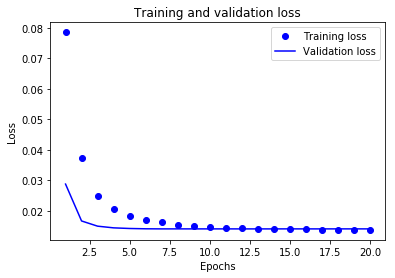

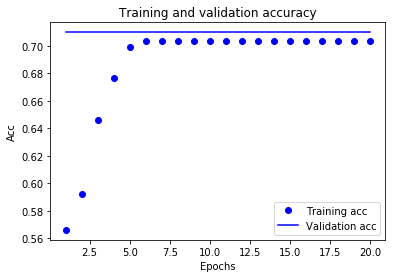

In [36]:
# for reproducability
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

# We create a Sequential model and add layers one at a time until we are happy with our network topology.
# Need a network large enough to capture the structure of the problem.. 
# Fully connected layers are defined using the Dense class: add(Dense)
# We will use the rectifier (relu) on the first two layers and the sigmoid in the output layer. 

# Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) 
#such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for
#training and making predictions to run on your hardware. When compiling, we must specify some additional
#properties required when training the network. Remember training a network means finding the
#best set of weights to make predictions for this problem.

len_token = len(counts)

model = Sequential()
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001),
                       input_shape=(len_token,))) # there are 5191 inputs ! => 10 nodes
model.add(layers.Dropout(0.6))
model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid')) # there are 2 probability outputs!
#ACTIVATION
# relu
# sigmoid
# tanh

# kernel_initializer
# kernel_regularizer

model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy']) #adamax
#OPTIMIZER
# there are three adaptive learning rate methods that have proven to be robust over many types of 
#neural network architectures: AdaGrad, RMSProp, and Adam. 
#Perhaps the most popular is Adam, as it builds upon RMSProp and adds momentum.

#LOSS
  #[Regression Loss Functions]
    #Mean Squared Error Loss: mse
    #Mean Squared Logarithmic Error Loss: mae
    #Mean Absolute Error Loss: msle
  #[Binary Classification Loss Functions]
    #Binary Cross-Entropy
    #Hinge Loss
    #Squared Hinge Loss
  #[Multi-Class Classification Loss Functions]
    #Multi-Class Cross-Entropy Loss
    #Sparse Multiclass Cross-Entropy Loss
    #Kullback Leibler Divergence Loss

#METRICS
# If additional metrics are monitored during training, they are also available to the callbacks
#via the same name, such as 
  #'acc' for accuracy on the training dataset and 
  #'val_acc' on the validation dataset. 
  #'mse' for mean squared error on the training dataset and
  #'val_mse' on the validation dataset.
 

history = model.fit(X_train,Y_train,epochs=20, validation_data=(X_test,Y_test))
# We can fit the model and use the test set as validation while training...
# history object is returned from calls to the fit() function..print(history.history.keys())
''' ['loss', 'acc', 'val_loss', 'val_acc'] '''
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']


predictions = model.predict(X_test) #it will gives Y...
# You can make predictions on testset or validation data 


# VISUALIZATION
epochs = range(1,len(loss)+1) # X

plt.plot(epochs, loss, 'bo', label='Training loss') # X, Y
plt.plot(epochs, val_loss, 'b', label='Validation loss') # X, Y

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc') # X, Y
plt.plot(epochs, val_acc, 'b', label='Validation acc') # X, Y

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

#we can see that the model has comparable performance on both train
#and validation datasets (labeled test). If these parallel plots start to depart consistently, it
#might be a sign to stop training at an earlier epoch !!!


### the first score

In [37]:
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.236
The Spearman's correlation coefficient is: 0.137


In [ ]:
###########################################################################################################

In [ ]:
###########################################################################################################

# 2> Pre-Exploration 
- Hyperparameter Tuning
- Kfold Cross Validation

## Pre-exploration: Hyperparameter Tuning
Do we have the best hyperparameters?

- we use Grid Search to evaluate different configurations for our neural network model and report on the combination that provides the best estimated performance.
- We define multiple "base_model()" functions taking two arguments at a time and both of which have default values.
- Before creating our model, we define arrays of values for the parameter we wish to search, specifically:
  - (a) What dropout parameter to use?
  - (b) Which Neuron Activation Function to use?
  - (c) Which Learning rate Optimization Algorithm to use?
  - (d) Which Network Weight Initialization to use?
  - (e) What Batch-Size & NO.of Epoch to use? 

- This will allow us to evaluate the effect of using different schemes for our network.

In [38]:
# Hyperparameters tuning List

from sklearn.model_selection import GridSearchCV



#Dropout rate
dropout_rss = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #how many %of neuron to skip?
weight_constraint = [1, 2, 3, 4, 5]

#No.of Epoch
epochss = [20, 30, 50, 80, 100]
batchess = [5, 10, 20] #how many No.data points to skip?

#Learning rate OPTIMIZER
optimizerss = ['rmsprop','adagrad','sgd','adadelta','adam','adamax','nadam']

#Learning rate controls how much to update the weight at the end of each batch and
#the momentum controls how much to let the previous update influence the current weight update.
learn_rss = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]
momentumss = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

# our  Network Weight Initialization
kernel_initss = ['glorot_uniform','glorot_normal','normal','uniform',
                      'lecun_uniform','zero','he_normal','he_uniform']

#num_neuronss = [5, 10, 15, 20, 25, 30]
#activationss = ['softmax','softplus','softsign','relu','tanh','sigmoid','selu','hard_sigmoid','linear']

activationss = ['relu','elu','selu','linear']

kernel_lambdass = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

### (a) What dropout parameter to use?
- To get good results, dropout is best combined with a weight constraint such as the max-norm constraint.
- We try two different structures in terms of dropout location.

In [39]:
# 1.TUNING Dropout regularization 01. Thicker model

def base_model(dropout_rate=0.0, weight_constraint=0):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001),
                           input_shape=(len_token,))) # there are 5191 inputs ! => 10 nodes
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(2,activation='sigmoid')) # there are 2 probability outputs! 
    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) 
    return model

model = KerasRegressor(build_fn=base_model, epochs=20, batch_size=10, verbose=0)

param_grid = dict(dropout_rate=dropout_rss, weight_constraint=weight_constraint) # param to Investigate ONLY

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 12.1min
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 14.2min
[Parallel(

In [44]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.013625 using {'dropout_rate': 0.1, 'weight_constraint': 5}
-0.013674 (0.000237) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
-0.013737 (0.000293) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
-0.013657 (0.000217) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
-0.013645 (0.000256) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
-0.013677 (0.000207) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
-0.013683 (0.000225) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
-0.013686 (0.000256) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
-0.013651 (0.000262) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
-0.013667 (0.000235) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
-0.013625 (0.000291) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
-0.013689 (0.000248) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
-0.013684 (0.000249) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
-0.013684 (0.000251) with: {'dropout_rate': 0.2, 'weight

In [48]:
predictions = grid_result.predict(X_test)
Get_score(predictions, Y_test) # This shows a very slight improvement(+0.02) in short-term score.

The Spearman's correlation coefficient is: 0.263
The Spearman's correlation coefficient is: 0.141


In [49]:
# 1.TUNING Dropout regularization 02. Thinner model

def base_model_1(dropout_rate=0.0, weight_constraint=0):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(dropout_rate, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    return(model)

model = KerasRegressor(build_fn=base_model_1, epochs=20, batch_size=10, verbose=0)

param_grid = dict(dropout_rate=dropout_rss, weight_constraint=weight_constraint) # param to Investigate ONLY

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 20.3min finished


In [50]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.013277 using {'dropout_rate': 0.3, 'weight_constraint': 3}
-0.013307 (0.000240) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
-0.013383 (0.000278) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
-0.013345 (0.000273) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
-0.013328 (0.000252) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
-0.013321 (0.000272) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
-0.013356 (0.000258) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
-0.013333 (0.000269) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
-0.013389 (0.000284) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
-0.013300 (0.000221) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
-0.013311 (0.000246) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
-0.013346 (0.000275) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
-0.013363 (0.000315) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
-0.013319 (0.000233) with: {'dropout_rate': 0.2, 'weight

In [51]:
predictions = grid_result.predict(X_test)
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.338
The Spearman's correlation coefficient is: 0.163


> This shows good improvement**(0.26>0.33, 0.14>0.16)** in both short/long-term score. Hence, we will use the second struture(shallower) with using {'dropout_rate': 0.3, 'weight_constraint': 3}. This means we drop random 30% of input node on purpose.  

### (b) Which Neuron Activation Function to use?
- **relu**: any negative input become zero immediately which decreases the ability of the model to fit or train from the data properly.
- **elu**(Exponential linear unit): solves the Vanishing gradient problem. Elu tries to minimize the problem of relu and push the mean towards zero so that the learning rate increases. 
- **selu**(Scaled Exponential linear unit)  
- **linear**: activation is proportional to input

In [61]:
# 2.TUNING Neuron Activation Function

def base_model_2(act='relu'):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation=act, kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])    
    return model

model = KerasRegressor(build_fn=base_model_2, epochs=20, batch_size=10, verbose=0)

param_grid = dict(act=activationss) # param to Investigate ONLY

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.1min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.1min remaining:   45.9s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.6min remaining:   32.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.6min finished


In [62]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.013361 using {'act': 'selu'}
-0.013389 (0.000303) with: {'act': 'relu'}
-0.013468 (0.000299) with: {'act': 'elu'}
-0.013361 (0.000301) with: {'act': 'selu'}
-0.013463 (0.000242) with: {'act': 'linear'}


> Hence, we will use the second struture with using {'act': 'selu'} 

### (c) Which Learning Rate Optimization Algorithm to use?
- There are three adaptive learning rate methods that have proven to be robust over many types of neural network architectures: 
  - AdaGrad, RMSProp, and Adam. 
- Perhaps the most popular is Adam, as it builds upon RMSProp and adds momentum.
- We will save sgd(stochastic gradient descent) for later.

In [63]:
# 3.TUNING Optimization Algorithm

def base_model_3(optimizer='adam'):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])    
    return model

model = KerasRegressor(build_fn=base_model_3, epochs=20, batch_size=10, verbose=0)

param_grid = dict(optimizer=optimizerss) # param to Investigate ONLY

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:  2.0min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  2.2min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  2.2min remaining:   53.6s
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:  3.0min remaining:   29.6s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  3.0min finished


In [64]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.013344 using {'optimizer': 'adadelta'}
-0.013379 (0.000301) with: {'optimizer': 'rmsprop'}
-0.013732 (0.000237) with: {'optimizer': 'adagrad'}
-0.028836 (0.000268) with: {'optimizer': 'sgd'}
-0.013344 (0.000208) with: {'optimizer': 'adadelta'}
-0.014609 (0.000163) with: {'optimizer': 'adam'}
-0.013828 (0.000174) with: {'optimizer': 'adamax'}
-0.014967 (0.000162) with: {'optimizer': 'nadam'}


In [65]:
predictions = grid_result.predict(X_test)
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.421
The Spearman's correlation coefficient is: 0.167


> This shows good improvement**(0.26>0.33>0.42, 0.141>0.163>0.167)** in both short/long-term score. Hence, we will use the second struture with using {'optimizer': 'adadelta'}

### (d) Which Network Weight Initialization to use?
- We will use the same weight initialization method on each layer. Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer.

In [70]:
# 4.TUNING Network Weight Initialization

def base_model_4(init_mode='uniform'):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                          kernel_initializer=init_mode))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])    
    return model

model = KerasRegressor(build_fn=base_model_4, epochs=20, batch_size=10, verbose=0)

param_grid = dict(init_mode=kernel_initss) # param to Investigate ONLY

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  2.5min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  2.5min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  3.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  3.8min remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.8min finished


In [72]:
predictions = grid_result.predict(X_test)
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.403
The Spearman's correlation coefficient is: 0.171


> This shows slight decrease in short-term score **(0.26>0.33>0.42>0.40)** but good improvement **(0.141>0.163>0.167>0.171)** in long-term score. It seems a slight trade off has made.
Hence, we will use the second struture with using {'init_mode': 'he_normal'} 

### (e) What Batch-Size & NO.of Epoch to use?
- The batch size is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory. 
- The number of epochs is the number of times that the entire training dataset is shown to the network during training. Some networks are sensitive to the batch size, such as LSTM RNN or CNN. We want to investigate if our MLP is also sensitive to this.

In [82]:
# 5.TUNING Batch Size and NO.of Epochs

def base_model_5():
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                          kernel_initializer='he_normal'))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])    
    return model

model = KerasRegressor(build_fn=base_model_5, verbose=0)

param_grid = dict(epochs=epochss, batch_size=batchess) # param to Investigate ONLY

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)

grid_result = grid.fit(X_train, Y_train)

model.fit(X_train,Y_train, epochs=100, verbose=0, validation_data=(X_test,Y_test))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed: 18.3min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed: 19.6min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 21.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 21.0min finished


In [90]:
predictions = model.predict(X_test)
Get_score(predictions, Y_test) 
# This shows

The Spearman's correlation coefficient is: 0.446
The Spearman's correlation coefficient is: 0.200


> When we use epoch size:100, it shows a signifiant improvement in short-term score **(0.26>0.33>0.42>0.40>0.45)** and  **(0.141>0.163>0.167>0.171>0.200)** in long-term score. 

## Learning curve 01. MSE vs Epoch

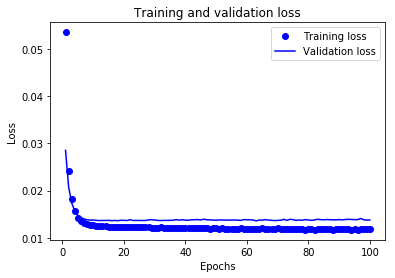

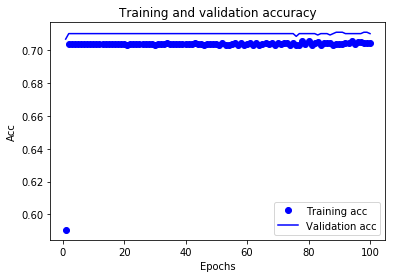

In [96]:
# This is the best model so far

len_token = len(counts)
model = Sequential()
model.add(layers.Dropout(0.3, input_shape=(len_token,)))
model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                       kernel_initializer='he_normal'))
model.add(layers.Dense(2, activation='sigmoid')) 
model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy']) 

history = model.fit(X_train,Y_train, epochs=100, verbose=0, validation_data=(X_test,Y_test))
# We can fit the model and use the test set as validation while training...
# history object is returned from calls to the fit() function..print(history.history.keys())
''' ['loss', 'acc', 'val_loss', 'val_acc'] '''
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
#r_sq = history.history['r_square']
#val_r_sq = history.history['val_r_square']

predictions = model.predict(X_test) #it will gives Y...
# You can make predictions on testset or validation data 


# VISUALIZATION
epochs = range(1,len(loss)+1) # X

plt.plot(epochs, loss, 'bo', label='Training loss') # X, Y
plt.plot(epochs, val_loss, 'b', label='Validation loss') # X, Y

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc') # X, Y
plt.plot(epochs, val_acc, 'b', label='Validation acc') # X, Y

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

> Both the training and validation loss decrease in an exponential fashion as the number of epochs is increased, suggesting that the model gains a high degree of accuracy as our epochs (or number of forward and backward passes) is increased.

> We get some potential evidence of "overfitting" where the **training loss** starts to decrease but the **validation loss** starts to increase but this does not seem clear.

## Learning curve 02. MSE vs Sample_size(instances)
We simply check the instance size up to 500 to see if we can detect any pattern. 

In [109]:
from sklearn.model_selection import learning_curve

def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2


def draw_learning_curves(X, Y, estimator, num_trainings):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, Y, cv=None, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 
                                                                                    num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training instances")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

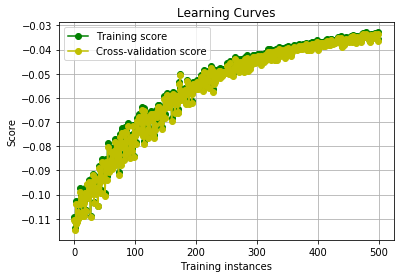

In [110]:
model = KerasRegressor(build_fn=base_model_5, verbose=0)

X_LC, Y_LC = randomize(X_train, Y_train) 

draw_learning_curves(X_LC, Y_LC, estimator=model, num_trainings=500)

> The change of training and validation scores(MSE) does not make difference by sample size. It seems the sample size does not affect the model performance and we have enough sample size to yield the same outcome. This curve continues to go up until it converges to 0.01 as the sample size increases. 

> ## It's not overfitting !!

## Pre-exploration:  CrossValidation.. 
Is our data homogeneous for model fitting? 

- Cross validation allows us to compare different ML algorithm. It provides a range of accuracy scores across (somewhat) different data sets.
- One can be a victim of skewed target values with Random subsampling and K-fold makes sure that we get similar target distribution in each of our folds (chunks) of our data.
- If we have smaller data it can be useful to benefit from k-fold cross-validation to maximize our ability to evaluate the neural network’s performance. This is possible in Keras because we can “wrap” any neural network such that it can use the evaluation features available in scikit-learn, including k-fold cross-validation. 
- To accomplish this, we first have to create a function that returns a compiled neural network. Next we use KerasRegressor. After this, we can use our neural network like any other scikit-learn learning algorithm (e.g. random forests, logistic regression). In our solution, we used cross_val_score to run a **5**-fold cross-validation on our neural network.
- ### cross_val_score() 
  - it returns an object that describes the evaluation of the 5 constructed models for each of the splits of the dataset. its score refers **MSE** (ignore the negative)

In [94]:
# Function to create model, required for KerasRegressor

def create_model():
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                           kernel_initializer='he_normal'))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])
    return(model)

# INstead of fit() we use keras model 
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# evaluate using 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [93]:
cross_val_score(model, X_train, Y_train, cv=kfold)

array([-0.01284506, -0.01375925, -0.01425725, -0.01332331, -0.01413171])

> We got MSE ranging **from 0.012 to 0.014** and it seems insignificant differences, thus we can say we can fit our model in an homogeneous manner on the dataset.

# 3> Exploration 
- ### Topology: Wider or Deeper?
  - Deeper Models with Greedy Layer-Wise Pre-Training
- ### Autoencoder with Greedy Layer-Wise Pre-Training

- ### Back to Basics: Stochastic Gradient Descent
  - Basic Hyperparameter Tuning
  - Lift Performance With Learning Rate Schedules
    - time-based learning rate schedule.
    - drop-based learning rate schedule.

## 3-1. Topology: Deeper Model with Greedy Layer-Wise Pre-Training
There are many concerns that can be optimized for a neural network model. Perhaps the point
of biggest leverage is the structure of the network itself, including the number of layers and
the number of neurons in each layer.

- One way to improve the performance of a neural network is to add more layers. We want to evaluate the effect of adding one more hidden layer to the model.
- Another approach is to add more neurons to increase the representational capacity of the model 

In general, **as the number of hidden layers is increased,** `the amount of error information propagated back to earlier layers is dramatically reduced !`. This means that weights in hidden layers close to the output layer are updated normally, whereas weights in hidden layers close to the input layer are updated minimally or **not at all** 

### Vanishing Gradient Issue!! 
The `vanishing gradient` meant that **weights in layers** close to the `input layer` **were not updated** in response to errors calculated on the training dataset. 
- `Greedy Layer-wise Pretraining` allows **very deep neural networks** to be successfully trained, achieving better performance. 
- `Pretraining` can be used to iteratively **deepen** a `supervised model` or an **`unsupervised model` that can be repurposed as a `supervised model`**.

- `Pretraining` may be useful for problems with `small amounts of labeled` data and `large amounts of unlabeled `data.

- `Unsupervised pretraining` may be appropriate when you have a significantly `larger number of unlabeled` examples that can be used to **initialize a model** prior to using a much smaller number of examples to fine tune the model weights for a `supervised task`.

### Starting point
- We evaluate the base model
- we calculate the accuracy of our base model and store the scores away in a dictionary against the number of layers in the model so we can plot the relationship between layers and accuracy later.

In [57]:
#  here is our best model so far 

def get_base(X,Y,X2,Y2):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                           kernel_initializer='he_normal'))
    model.add(layers.Dense(2, activation='sigmoid')) 
    model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])
    model.fit(X, Y, epochs=100, verbose=0, validation_data=(X2,Y2))
    return(model)

# evaluate its fitting..
# returns the accuracy on both datasets..

def evaluate_model(model, trainX, testX, trainy, testy):
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return train_acc, test_acc

base_model = get_base(X_train, Y_train, X_test, Y_test)

scores = dict()
train_acc, test_acc = evaluate_model(base_model, X_train, X_test, Y_train, Y_test)
print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))

# store scores for plotting
#scores[len(model.layers)] = (train_acc, test_acc)

> layers=3, train=0.705, test=0.710


# [process of greedy layer-wise pretraining]. 
- We build a function to add a new hidden layer and retrain the model but only update the weights in the newly added layer and in the output layer.
- This requires first storing the current output layer including its configuration and weights then add one new layer and re-train only the new layer.
- This function can then be called repeatedly based on the number of layers we wish to add to the model.


In [58]:
def add_layer(model, trainX, trainy, testX, testY):
    # remember the current output layer
    output_layer = model.layers[-1]
    # remove the output layer
    model.pop()
    # mark all remaining layers as non-trainable
    for i in model.layers:
        i.trainable = False
    # add a new hidden layer
    model.add(Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001), 
                    kernel_initializer='he_normal'))
    # re-add the output layer
    model.add(output_layer)
    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0, validation_data=(testX,testY))

- We will add 10 layers, one at a time, and evaluate the performance of the model after each additional layer is added to get an idea of how it is impacting performance.
- Train and test accuracy scores are stored in the dictionary against the number of layers in the model then we add layers and evaluate the updated model. 

- At the end of the run, a line plot is created showing the number of layers in the model (x-axis) compared to the model accuracy on the train and test datasets. We would expect the addition of layers to improve the performance of the model on the training dataset and perhaps even on the test dataset.

- We will keep adding this following layer
### add(Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001), kernel_initializer='he_normal'))

In [59]:
n_layers = 10

scores = dict()

for i in range(n_layers):
    # add layer
    add_layer(base_model, X_train, Y_train, X_test, Y_test)
    
    # evaluate model
    train_acc, test_acc = evaluate_model(base_model, X_train, X_test, Y_train, Y_test)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
    # store scores for plotting
    scores[len(base_model.layers)] = (train_acc, test_acc)

> layers=4, train=0.704, test=0.710
> layers=5, train=0.704, test=0.710
> layers=6, train=0.704, test=0.710
> layers=7, train=0.704, test=0.710
> layers=8, train=0.704, test=0.710
> layers=9, train=0.704, test=0.710
> layers=10, train=0.704, test=0.710
> layers=11, train=0.704, test=0.710
> layers=12, train=0.704, test=0.710
> layers=13, train=0.704, test=0.710


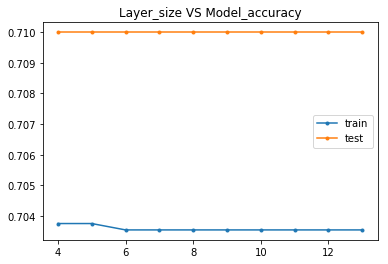

In [60]:
# plot number of added layers vs accuracy
plt.plot(scores.keys(), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(scores.keys(), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.title('Layer_size VS Model_accuracy')
plt.legend()
plt.show()

> In this plot, the train (blue) and test set (orange) accuracy as each additional layer is added to the model.
> In this case, we can see that the baseline model does reasonably well on this problem, but as the layers are increased, we cannot see any difference in accuracy for the model on the training and testing set. 

In [149]:
len_token = len(counts)
f_model = Sequential()
f_model.add(layers.Dropout(0.3, input_shape=(len_token,)))
f_model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                        kernel_initializer='he_normal'))
f_model.add(layers.Dense(2, activation='sigmoid')) 
f_model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])
f_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_data=(X_test,Y_test))


predictions = f_model.predict(X_test) #it will gives Y...
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.438
The Spearman's correlation coefficient is: 0.187


> So deeper model cannot be our solution!

## 3-2. Autoencoder with Greedy Layer-Wise Pre-Training
We will develop an autoencoder model that will be trained to "reconstruct input data". In order to use in an unsupervised way for regression, we will remove the output layer, add and fit a new output layer for this regression.
- Autoencoders are considered an unsupervised learning technique since they don’t need explicit labels to train on. They generate their own labels from the training data.
- Autoencoder compress the input into a lower-dimensional code and then reconstruct the output from this representation. To build an autoencoder we need 3 things: 
  - encoding method
  - decoding method
  - loss function to compare the output with the target.
  
- The first step is to define, fit, and evaluate an autoencoder model, then we modify it to predict the input as the output 
- Next, we use MSE to evaluate how good the model is at reconstructing a given input.

### Step 01. Define, fit and evaluate the base autoencoder
- We build "base_autoencoder()" function in order to prepare our base autoencoder to which we can add and greedily train layers.
- We modify it to predict the input as the output!!!

In [110]:
def base_autoencoder(trainX, testX):
    len_token = len(counts)
    model = Sequential()
    model.add(layers.Dense(10, input_dim=len_token, activation='selu', 
                           kernel_regularizer=regularizers.l2(0.001),
                           kernel_initializer='he_normal'))
    # this one!
    model.add(layers.Dense(len_token, activation='linear')) 

    model.compile(optimizer='adadelta', loss='mse')
    
    model.fit(trainX, trainX, epochs=100, verbose=0, validation_data=(testX,testX))

    # evaluate reconstruction loss
    train_mse = model.evaluate(trainX, trainX, verbose=0)
    test_mse = model.evaluate(testX, testX, verbose=0)
    print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))
    return model

# get the base autoencoder
aen_model = base_autoencoder(X_train, X_test)

> reconstruction error train=0.002, test=0.002


### Step 02.  Adding new layers to autoencoder Regressor

- The hidden layers will be used as the basis of a regressor with a new output layer that must be trained then used to make predictions before adding back the original output layer so that we can continue to add layers to the autoencoder. 
- The first step is to reference, then remove the output layer of the autoencoder model. 

In [113]:
# add one new layer and re-train only the new layer
def add_layer_to_autoencoder(model, trainX, testX):
    # remember the current output layer
    output_layer = model.layers[-1]
    # remove the output layer
    model.pop()
    # mark all remaining layers as non-trainable
    for layer in model.layers:
        layer.trainable = False
        
    # add a new hidden layer
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                        kernel_initializer='he_normal'))  
    
    # re-add the output layer
    model.add(output_layer)
    # fit model
    model.fit(trainX, trainX, epochs=100, verbose=0)
    
    # evaluate reconstruction loss
    train_mse = model.evaluate(trainX, trainX, verbose=0)
    test_mse = model.evaluate(testX, testX, verbose=0)
    print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))


We are now ready to define the process for adding and pretraining layers to the model. The
process for adding layers is much the same as in the previous work, except we are optimizing **reconstruction loss** rather than regression accuracy for the new layer. 

We can now repeatedly call this function, adding layers, and evaluating the effect by using
the autoencoder as the basis for evaluating a new regressor.

In [114]:
def evaluate_autoencoder_as_regressor(model, trainX, trainy, testX, testy):
    # remember the current output layer
    output_layer = model.layers[-1]
    # remove the output layer
    model.pop()
    # mark all remaining layers as non-trainable
    for layer in model.layers:
        layer.trainable = False

    # add new output layer ## this one!!
    model.add(layers.Dense(2, activation='sigmoid')) 
    
    # compile model
    model.compile(optimizer='adadelta', loss='mse', metrics=['acc'])

    # fit model
    model.fit(trainX, trainy, epochs=100, verbose=0)
    
    # evaluate model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)

    # put the autoencoder back together but removing the classification output
    # layer, adding back the original autoencoder output layer and recompiling the model with an
    # appropriate loss function for reconstruction.

    model.pop()
    
    model.add(output_layer)
    
    model.compile(loss='mse', optimizer='adadelta')
    
    return train_acc, test_acc

The above function can be called to evaluate the baseline autoencoder model and then store the accuracy scores in a dictionary against the number of layers in the model (in this case two).

In [115]:
# evaluate the base model
scores = dict()

train_acc, test_acc = evaluate_autoencoder_as_regressor(aen_model, X_train, Y_train, X_test, Y_test)
print('> regressor accuracy layers=%d, train=%.3f, test=%.3f' % (len(aen_model.layers), 
                                                                 train_acc, test_acc))
scores[len(aen_model.layers)] = (train_acc, test_acc)


> regressor accuracy layers=2, train=0.704, test=0.710


In [116]:
# add layers and evaluate the updated model
n_layers = 5

for _ in range(n_layers):
    # add layer
    add_layer_to_autoencoder(aen_model, X_train, X_test)
    # evaluate model
    train_acc, test_acc = evaluate_autoencoder_as_regressor(aen_model, X_train, Y_train, X_test, Y_test)
    print('> regressor accuracy layers=%d, train=%.3f, test=%.3f' % (len(aen_model.layers), 
                                                                      train_acc, test_acc))
    # store scores for plotting
    scores[len(aen_model.layers)] = (train_acc, test_acc)


> reconstruction error train=0.002, test=0.002
> regressor accuracy layers=3, train=0.704, test=0.710
> reconstruction error train=0.002, test=0.002
> regressor accuracy layers=4, train=0.704, test=0.710
> reconstruction error train=0.002, test=0.002
> regressor accuracy layers=5, train=0.704, test=0.710
> reconstruction error train=0.002, test=0.002
> regressor accuracy layers=6, train=0.704, test=0.710
> reconstruction error train=0.002, test=0.002
> regressor accuracy layers=7, train=0.704, test=0.710


All accuracy scores are collected and we can use them to create a line graph of the number of model layers vs train and test set accuracy.

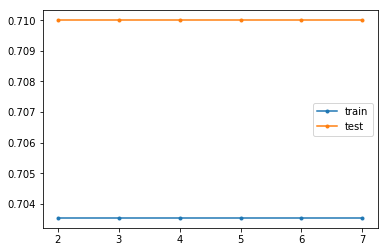

In [117]:
# plot number of added layers vs accuracy

keys = scores.keys()
plt.plot(keys, [scores[k][0] for k in keys], label='train', marker='.')
plt.plot(keys, [scores[k][1] for k in keys], label='test', marker='.')
plt.legend()
plt.show()

> We add additional 6 layers, but there is no improvement in the model performance.   


In [120]:
output_layer = aen_model.layers[-1]
# remove the output layer
aen_model.pop()

# add new output layer ## this one!!
aen_model.add(layers.Dense(2, activation='sigmoid')) 
    
# compile model
aen_model.compile(optimizer='adadelta', loss='mse', metrics=['acc'])

# fit model
aen_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_data=(X_test,Y_test))

In [121]:
predictions = aen_model.predict(X_test) #it will gives Y...
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: nan
The Spearman's correlation coefficient is: nan


In [122]:
predictions.shape

(1200, 2)

In [123]:
Y_test.shape

(1200, 2)

> It seems unfortunately adding layers to the autoencoder regressor does not help. 

### Step 03. autoencoder Regressor without adding layers

In [127]:
def base_autoencoder(trainX, testX):
    len_token = len(counts)
    model = Sequential()

    # this one!
    model.add(layers.Dropout(0.3, input_shape=(len_token,)))
    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                           kernel_initializer='he_normal'))
    model.add(layers.Dense(len_token, activation='linear')) 
    
    model.compile(optimizer='adadelta', loss='mse')
    
    model.fit(trainX, trainX, epochs=100, verbose=0, validation_data=(testX,testX))

    # evaluate reconstruction loss
    train_mse = model.evaluate(trainX, trainX, verbose=0)
    test_mse = model.evaluate(testX, testX, verbose=0)
    print('> reconstruction error train=%.3f, test=%.3f' % (train_mse, test_mse))
    return model

# get the base autoencoder
aen_model = base_autoencoder(X_train, X_test)

> reconstruction error train=0.002, test=0.002


In [129]:
output_layer = aen_model.layers[-1]
# remove the output layer
aen_model.pop()

# add new output layer ## this one!!
aen_model.add(layers.Dense(2, activation='sigmoid')) 
    
# compile model
aen_model.compile(optimizer='adadelta', loss='mse', metrics=['acc'])

# fit model
aen_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_data=(X_test,Y_test))

In [130]:
predictions = aen_model.predict(X_test) #it will gives Y...
Get_score(predictions, Y_test)

The Spearman's correlation coefficient is: 0.441
The Spearman's correlation coefficient is: 0.182


## 3-3. Back to Basics: Stochastic Gradient Descent
The classical algorithm to train neural networks is called stochastic gradient descent. We can achieve increased performance and faster training on some problems by using a **learning rate** that changes during training.

### a) Parameter tuning for SGD. What's the best hyperparameters? 

- If we only use a bunch of random subsets of our data, then it would not be the best estimate of the gradient but it's quick and because of its iteration, the accuracy is also great. This is where "Stochastic Gradient Descent" comes into play. Since we still need to use all data, we split the data into several batches. 
- Constraining the weight matrix directly is another kind of regularization. If we use a simple L2 regularization term we penalize high weights with our loss function. With this constraint, we regularize directly. This seems to work especially well in combination with a dropout layer. 

In [22]:
from keras.constraints import maxnorm
from keras.optimizers import SGD

#maxnorm(m) will, if the L2-Norm of your weights exceeds m, scale our whole weight matrix by a factor 
#that reduces the norm to m.

In [154]:
# TUNING  Stochastic Gradient Descent "Learning Rate"and "Momentum" in the context of optimizer

# Learning rate controls how much to update the weight at the end of each batch 
# Momentum controls how much to let the previous update influence the current weight update.

momentumss = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]


def base_model_grd(momentum=0):
    
    len_token = len(counts)
    
    model = Sequential()

    model.add(layers.Dropout(0.3, input_shape=(len_token,)))

    model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001), 
                            kernel_initializer = 'he_normal', kernel_constraint = maxnorm(5))) 
    model.add(layers.Dense(2, activation='sigmoid')) 

    sgd = SGD(lr=0.1, momentum=momentum, decay=0.0, nesterov=False)

    model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

    return model

param_grid = dict(momentum=momentumss) # param to Investigate ONLY

model = KerasRegressor(build_fn=base_model_grd, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=10, cv=3)
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    8.2s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    8.7s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   12.3s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   12.5s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   12.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   13.2s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   14.9s finished


In [155]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.027576 using {'momentum': 0.9}
-0.034236 (0.000601) with: {'momentum': 0.0}
-0.034169 (0.000278) with: {'momentum': 0.2}
-0.032929 (0.000289) with: {'momentum': 0.4}
-0.031955 (0.000257) with: {'momentum': 0.6}
-0.030207 (0.000378) with: {'momentum': 0.8}
-0.027576 (0.000365) with: {'momentum': 0.9}


In [164]:
len_token = len(counts)
s_model = Sequential()
s_model.add(layers.Dropout(0.3, input_shape=(len_token,)))
s_model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                         kernel_initializer='he_normal', kernel_constraint = maxnorm(5)))
s_model.add(layers.Dense(2, activation='sigmoid'))
            
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)

s_model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
            
s_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_data=(X_test,Y_test))


predictions = s_model.predict(X_test) 
Get_score(predictions, Y_test)

#maxnorm:  4(0.4, 0.17) - 5(0.45, 0.165) - 6(0.42, 0.127)

The Spearman's correlation coefficient is: 0.452
The Spearman's correlation coefficient is: 0.165


### b) Improve Performance With Learning Rate Schedules 
We want to use techniques that reduce the learning rate over time during training. We make large changes, using learning rate values at the beginning of the training. Then gradually decreasing the learning rate; therefore, smaller training updates are made to weights later in the training. This has the effect of quickly learning good weights early and fine tuning them later. Two popular and easy to use learning rate schedules are as follows:
- > ## Time based Learning Rate schedule: 
  - Decrease the learning rate gradually based on the `epoch`.
- > ## Drop based Learning Rate schedule: 
  - Decrease the learning rate, using `punctuated large drops` at specific epochs.

The default schedule is to use a "constant learning rate" to update network weights for each training epoch. 

### b-1) Time-based Learning Rate schedule and `Decay`

The stochastic gradient descent optimization algorithm implementation in the SGD class has an argument called **"decay"**. This argument is used in the "time-based learning rate decay schedule equation" as follows:

`
LearningRate = LearningRate * 1/(1 + decay*epoch) 
`
- When the decay argument is zero (the default), this has no effect on the learning rate.
- When the decay argument is specified, it will decrease the learning rate from the previous epoch by the given fixed amount. For example, if we use the initial learning rate value of 0.1 and the decay of 0.001, the first 5 epochs will adapt the learning rate as follows: 0.1 -> 0.0999000999 -> 0.0997006985....

We can create a schedule by setting the decay value as follows: 

`
Decay = LearningRate / Epochs
`

In [169]:
len_token = len(counts)
s_model = Sequential()
s_model.add(layers.Dropout(0.3, input_shape=(len_token,)))
s_model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                         kernel_initializer='he_normal', kernel_constraint = maxnorm(5)))
s_model.add(layers.Dense(2, activation='sigmoid'))
            
# Compile 
epochs = 100
lr = 0.1
momentum = 0.9
decay_rate = lr / epochs
sgd = SGD(lr=lr, momentum=momentum, decay=decay_rate, nesterov=False)

s_model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
            
# fit    
s_model.fit(X_train, Y_train, epochs=epochs, verbose=0, validation_data=(X_test,Y_test))

predictions = s_model.predict(X_test) 

scores = s_model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (s_model.metrics_names[1], scores[1]*100))

acc: 70.35%


In [170]:
s_model.metrics_names

['loss', 'acc']

In [171]:
Get_score(predictions, Y_test) # overfitting...? the decay should be 0...

The Spearman's correlation coefficient is: 0.438
The Spearman's correlation coefficient is: 0.187


### b-2) Drop-based Learning Rate schedule
How to systematically drop the learning rate at `specific times` during training? We want to drop the learning rate by half every fixed number of epochs. For example, we may have an initial learning rate of 0.1 and drop it by a factor of 0.5 every 10 epochs. The first 10 epochs of training would use a value of 0.1, in the next 10 epochs a learning rate of 0.05 would be used, and so on.

The "LearningRate Scheduler" callback allows us to define a function to call that takes the **epoch number** as an argument and returns the **learning rate** to use in stochastic gradient descent. 

In [23]:
import math
from keras.callbacks import LearningRateScheduler


'''
LearningRate = LearningRate(0) * DropRate to the power: floor{(1 + epoch)/epoch_drop} 
'''

#Epoch_Drop is how often the learning rate is dropped in epochs and 
#DropRate is how much to drop the learning rate each time it is dropped

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.3
    epochs_drop = 15.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [24]:
len_token = len(counts)
s_model = Sequential()
s_model.add(layers.Dropout(0.3, input_shape=(len_token,)))
s_model.add(layers.Dense(10, activation='selu', kernel_regularizer=regularizers.l2(0.001),
                         kernel_initializer='he_normal', kernel_constraint = maxnorm(5)))
s_model.add(layers.Dense(2, activation='sigmoid'))


# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)

s_model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])


# Fit the model
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

s_model.fit(X_train, Y_train, epochs=100, callbacks = callbacks_list, verbose=0, 
            validation_data=(X_test,Y_test))

predictions = s_model.predict(X_test) #it will gives Y...

scores = s_model.evaluate(X_train, Y_train, verbose=0)
print("%s: %.2f%%" % (s_model.metrics_names[1], scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
acc: 70.35%


In [25]:
Get_score(predictions, Y_test) 

The Spearman's correlation coefficient is: 0.440
The Spearman's correlation coefficient is: 0.187


## save the model!

`*model.save(filepath)*` to save a Keras model into a single HDF5 file which will contain:

- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

In [24]:
s_model.save('./my_model.h5')  # creates a HDF5 file 'my_model.h5'

## Create CSV

In [34]:
Y2 = ground_truth[['video','short-term_memorability','long-term_memorability']]; Y2.head()

,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


In [39]:
Y2.values[:, 1:]

array([[0.924, 0.846],
       [0.9229999999999999, 0.667],
       [0.863, 0.7],
       ...,
       [0.713, 0.818],
       [0.9540000000000001, 1.0],
       [0.953, 0.615]], dtype=object)

In [44]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)
                                                    

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape) 

X_train (4800, 5191)
X_test (1200, 5191)
Y_train (4800, 3)
Y_test (1200, 3)


In [45]:
# Fit the model
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

s_model.fit(X_train, Y_train.values[:, 1:], epochs=100, callbacks = callbacks_list, verbose=0, 
            validation_data=(X_test,Y_test.values[:, 1:]))

predictions = s_model.predict(X_test) #it will gives Y...

scores = s_model.evaluate(X_train, Y_train.values[:, 1:], verbose=0)
print("%s: %.2f%%" % (s_model.metrics_names[1], scores[1]*100))

acc: 70.38%


In [57]:
len(predictions[:, 0])

1200

In [47]:
len(Y_test)

1200

In [51]:
Y_test.head()

,video,short-term_memorability,long-term_memorability
1782,video2215.webm,0.978,1.000
3917,video4912.webm,0.880,0.929
221,video279.webm,0.805,0.583
2135,video2652.webm,0.750,0.833
5224,video6543.webm,0.953,0.933


In [58]:
Y_test['Short-term_Prediction'] = predictions[:, 0]

/home/minkun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
Y_test['Long-term_Prediction'] = predictions[:, 1]

/home/minkun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
Y_test.head()

,video,short-term_memorability,long-term_memorability,Short-term_Prediction,Long-term_Prediction
1782,video2215.webm,0.978,1.000,0.880121,0.812691
3917,video4912.webm,0.880,0.929,0.843142,0.773682
221,video279.webm,0.805,0.583,0.873424,0.814956
2135,video2652.webm,0.750,0.833,0.793727,0.689226
5224,video6543.webm,0.953,0.933,0.867764,0.796132


In [63]:
Y_test.to_csv('final_score.csv')